<a href="https://colab.research.google.com/github/tutalae/TensorFlow/blob/main/Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

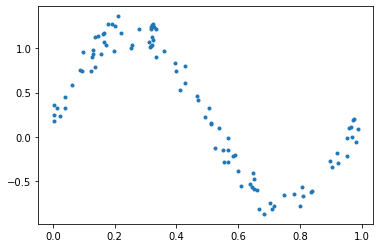

In [2]:
N = 100
X = np.random.rand(N, 1)
Y = np.sin(2 * np.pi * X) + 0.4 * np.random.rand(N, 1)
plt.plot(X, Y, '.')
plt.show()

In [3]:
def relu(x):
  return tf.where(x>=0, x, 0)

class MLP():
  def __init__(self, neurons=[1, 100, 100, 1], activation=[relu, relu, None]):
    self.W = []
    self.activation = activation
    for i in range(1, len(neurons)):
      self.W.append(tf.Variable(np.random.randn(neurons[i-1], neurons[i]))) # W
      self.W.append(tf.Variable(np.random.randn(neurons[i]))) # b
  def __call__(self, x):
    for i in range(0, len(self.W), 2):
      x = x @ self.W[i] + self.W[i+1]
      if self.activation[i // 2] is not None:
        x = self.activation[i // 2](x)
    return x
  def fit(self, X, Y, lr=0.0001, epochs=2000):
    for epoch in range(epochs):
      with tf.GradientTape() as t:
        loss = tf.reduce_mean((self(X) - Y)**2)
      dW = t.gradient(loss, self.W)
      for i, W in enumerate(self.W):
        W.assign_sub(lr * dW[i])
      if epoch % 1000 == 0:
        print(epoch, loss.numpy())

In [4]:
lr = 0.0001
model = MLP()
model.fit(X, Y, lr, 7000)

0 116.14538700491092
1000 0.02241204888902628
2000 0.016592278443722817
3000 0.014299404598034677
4000 0.012803056277816988
5000 0.01206590374736491
6000 0.011540918860825167


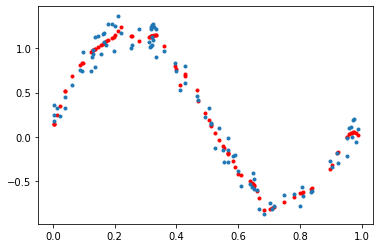

In [5]:
Z = model(X)
plt.plot(X, Z, '.r')
plt.plot(X, Y, '.')
plt.show()

In [6]:
# XOR
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = np.array([[0, 1, 1, 0]]).T

In [7]:
model = MLP(neurons=[2, 100, 100, 1], activation=[relu, relu, None])
model.fit(X, Y)

0 3597.4703144388686
1000 1.6812598042522814e-29


In [8]:
tf.round(model(X)).numpy()

array([[0.],
       [1.],
       [1.],
       [0.]])

In [9]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', header=None)
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [10]:
itrain = []
itest = []
X = df.iloc[:, :4].values
L = df.iloc[:, -1].values
classes = np.unique(L)
split = 0.5
Y = []
for c in classes:
  Idx = L == c
  idx = np.where(Idx)[0]
  sp = int(split * len(idx))
  itrain.extend(idx[:sp])
  itest.extend(idx[sp:])
  Y.append(Idx.astype(np.int)) # one-hot
Y = np.array(Y).T
print(Y)

[[1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 1 0]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 [0 0 1]
 

In [11]:
model = MLP([4, 100, 50, 3], [tf.sigmoid, tf.sigmoid, tf.sigmoid])
model.fit(X[itrain], Y[itrain], lr=0.1, epochs=5000)

0 0.3884724358811075
1000 0.02562736439525624
2000 0.01449266553901181
3000 0.010323043349439013
4000 0.008148104458714455


In [12]:
Z = model(X[itest])

In [13]:
tf.argmax(Z, axis=1)

<tf.Tensor: shape=(75,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2])>

In [14]:
tf.argmax(Y[itest], axis=1)

<tf.Tensor: shape=(75,), dtype=int64, numpy=
array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2])>

In [15]:
np.sum(tf.argmax(Y[itest], axis=1) == tf.argmax(Z, axis=1)) / len(itest)

0.96